# Week3授業前課題1 アヤメの分析

## 【問題1】データの取得

|Attribute	    |説明       |
|:--------------|:-----------|
|sepal length	|ガクの長さ |
|sepal width	|ガクの幅   |
|petal length	|花弁の長さ |
|petal width	|花弁の幅   |

In [136]:
from sklearn.datasets import load_iris

# アヤメセットを読み込む
iris_data = load_iris()

#print(str(iris_data))

In [137]:
list(iris_data.target_names)

['setosa', 'versicolor', 'virginica']

In [138]:
import pandas as pd

# 説明変数
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [139]:
# 目的変数
y = pd.DataFrame(iris_data.target, columns=["species"])
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 【問題2】データの結合

In [140]:
df = pd.concat([X, y], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題3】データの確認

In [141]:
# 先頭から4番目までのサンプルを表示する。
# head関数を使用
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [142]:
# info関数を使用
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Non-Null Countが全ての列で150なので、欠損値なし。

In [143]:
# describe関数を使用
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [144]:
# disnull関数を使用
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [145]:
# ラベル事のサンプル数
species0 = df[df["species"] == 0]
species1 = df[df["species"] == 1]
species2 = df[df["species"] == 2]

print("species0:{}個".format(len(species0)))
print("species1:{}個".format(len(species1)))
print("species2:{}個".format(len(species2)))

species0:50個
species1:50個
species2:50個


In [146]:
# 上と同様にラベル事のサンプル数
# .value_countsを使用
vc = df['species'].value_counts(sort=False)
vc

0    50
1    50
2    50
Name: species, dtype: int64

In [147]:
# .sumを使用
# 列毎の合計　（列毎に合計しても意味は無い）
df_sum = df.sum(axis=0)
df_sum

sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
species              150.0
dtype: float64

In [148]:
# 行毎の合計　（行毎に合計しても意味は無い）
df_sum = df.sum(axis=1)
df_sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    19.2
146    17.7
147    18.7
148    19.3
149    17.8
Length: 150, dtype: float64

In [149]:
df_mean = df.mean(axis=0)
df_mean

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
species              1.000000
dtype: float64

## 【問題4】irisデータセット自体の調査

＜setosa＞


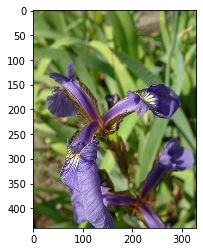

In [169]:
import matplotlib.image as mpimg

img_setosa = mpimg.imread("./Iris_setosa.jpg")
print("＜setosa＞")
imgplot = plt.imshow(img_setosa)

＜versicolor＞


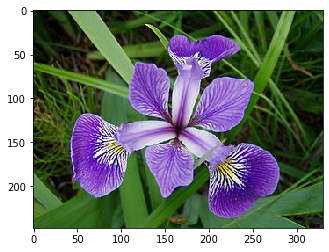

In [170]:
img_versicolor = mpimg.imread("./Iris_versicolor.jpg")
print("＜versicolor＞")
imgplot = plt.imshow(img_versicolor)

＜virginica＞


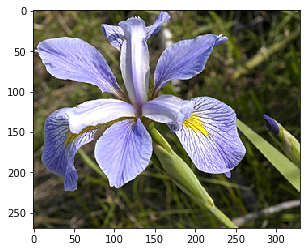

In [171]:
img_virginica = mpimg.imread("./Iris_virginica.jpg")
print("＜virginica＞")
imgplot = plt.imshow(img_virginica)

## 【問題5】必要なデータを抽出

### sepal_widthの列を３つの異なる方法で抽出する

In [150]:
# ①
df["sepal width (cm)"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [151]:
# ②
df_loc = df.loc[:,["sepal width (cm)"]]
print("{}".format(type(df_loc)))
df_loc

<class 'pandas.core.frame.DataFrame'>


,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [152]:
# ③
df_iloc = df.iloc[:,1]
print("{}".format(type(df_iloc)))
df_iloc


<class 'pandas.core.series.Series'>


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [153]:
# 50番目から99番目までのデータを抽出する
dataFrom = 50
dataTo = 99
from50to99 = df.iloc[dataFrom:dataTo+1,]
from50to99

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [154]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
dataFrom = 50
dataTo = 99
petal_length_col = df.loc[dataFrom:dataTo + 1, ["petal length (cm)"]]
petal_length_col

,petal length (cm)
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [155]:
df[df["petal width (cm)"] == 0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


loc:行ラベル（行名）、列ラベル（列名）等のラベル名を指定して取得する。戻り値はpandas.core.frame.DataFrame型  
iloc:行番号、列番号の範囲を指定して取得する。戻り値はpandas.core.series.Series型

## 【問題6】図の作成

([<matplotlib.patches.Wedge at 0x1a4cd7f6c50>,
 [Text(0.9526279613277876, 0.5499999702695113, 'setosa'),
  Text(-1.029894326480056e-07, -1.0999999999999954, 'versicolor'),
  Text(-0.9526278583383436, 0.5500001486524352, 'virginica')],
 [Text(0.5196152516333387, 0.2999999837833698, '33.3%'),
  Text(-5.617605417163941e-08, -0.5999999999999974, '33.3%'),
  Text(-0.5196151954572783, 0.30000008108314646, '33.3%')])

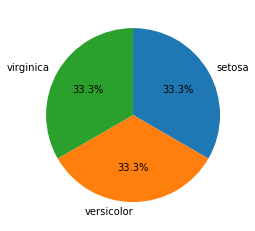

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
labels = iris_data.target_names
plt.pie(df['species'].value_counts(sort=False), labels = labels, autopct = '%1.1f%%', startangle = 90, counterclock=False) 

Text(0.5, 1.0, 'sepal length (cm)')

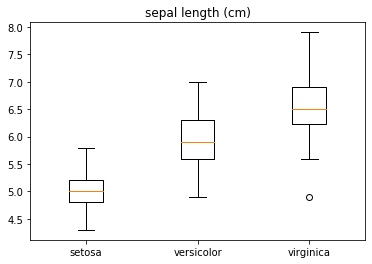

In [157]:
#品種毎にデータフレームを切り分け
df_setosa = df[df["species"]==0]
df_virgiclor = df[df["species"]==1]
df_virginica = df[df["species"]==2]

# ①sepal lengthの箱ひげ図を描画
plt.boxplot([df_setosa["sepal length (cm)"], df_virgiclor["sepal length (cm)"], df_virginica["sepal length (cm)"]], labels=iris_data.target_names)
plt.title("sepal length (cm)")

virginicaのsepal length=4.9は異常値と判定

Text(0.5, 1.0, 'sepal width (cm)')

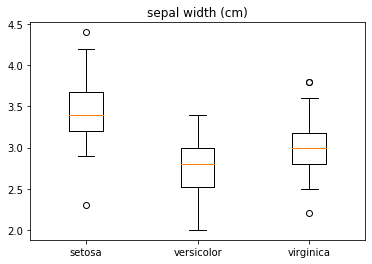

In [158]:
# ②sepal widthの箱ひげ図を描画
plt.boxplot([df_setosa["sepal width (cm)"], df_virgiclor["sepal width (cm)"], df_virginica["sepal width (cm)"]], labels=iris_data.target_names)
plt.title("sepal width (cm)")

Text(0.5, 1.0, 'petal length (cm)')

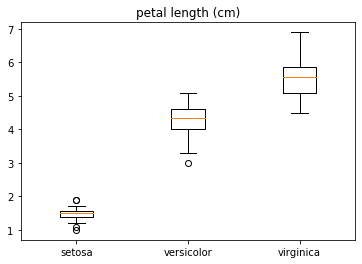

In [159]:
# ③petal lengthの箱ひげ図を描画
plt.boxplot([df_setosa["petal length (cm)"], df_virgiclor["petal length (cm)"], df_virginica["petal length (cm)"]], labels=iris_data.target_names)
plt.title("petal length (cm)")

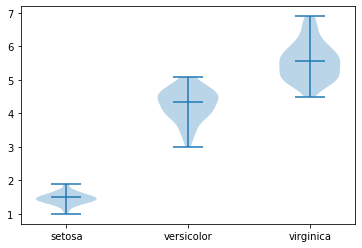

In [160]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# バイオリン図を描画
ax.violinplot([df_setosa["petal length (cm)"],df_virgiclor["petal length (cm)"],df_virginica["petal length (cm)"]], showmedians=True)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels([iris_data.target_names[0], iris_data.target_names[1], iris_data.target_names[2]])
plt.show()

箱ひげ図では、四分位数は分かるが、箱型の為、データの分布が分かり難いが、  
バイオリン図では各点のデータ量が横幅として分かるので、データの分布が分かりやすい。

## 【問題7】特徴量間の関係の確認

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9323 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9322 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9323 missing from current font.
  font.set_text(s, 0, flags=flags)


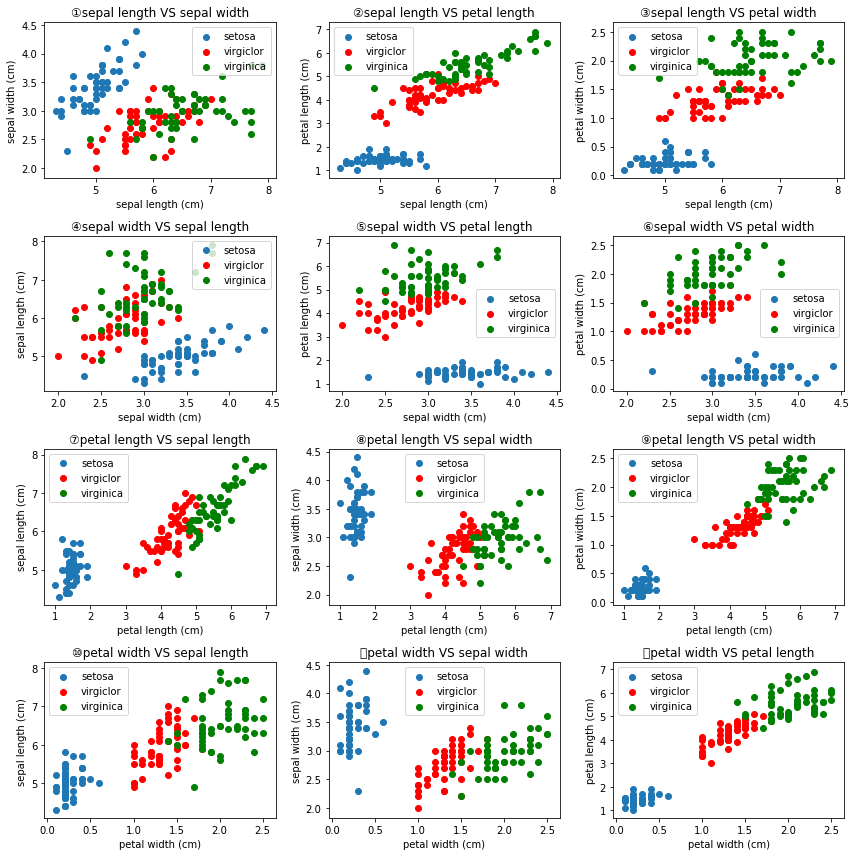

In [161]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(12, 12), tight_layout = True)

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(4, 3, 1, title ="①sepal length VS sepal width", xlabel ="sepal length (cm)", ylabel ="sepal width (cm)")
ax2 = fig.add_subplot(4, 3, 2, title ="②sepal length VS petal length", xlabel ="sepal length (cm)", ylabel ="petal length (cm)")
ax3 = fig.add_subplot(4, 3, 3, title ="③sepal length VS petal width", xlabel ="sepal length (cm)", ylabel ="petal width (cm)")

ax4 = fig.add_subplot(4, 3, 4, title ="④sepal width VS sepal length", xlabel ="sepal width (cm)", ylabel ="sepal length (cm)")
ax5 = fig.add_subplot(4, 3, 5, title ="⑤sepal width VS petal length", xlabel ="sepal width (cm)", ylabel ="petal length (cm)")
ax6 = fig.add_subplot(4, 3, 6, title ="⑥sepal width VS petal width", xlabel ="sepal width (cm)", ylabel ="petal width (cm)")

ax7 = fig.add_subplot(4, 3, 7, title ="⑦petal length VS sepal length", xlabel ="petal length (cm)", ylabel ="sepal length (cm)")
ax8 = fig.add_subplot(4, 3, 8, title ="⑧petal length VS sepal width", xlabel ="petal length (cm)", ylabel ="sepal width (cm) ")
ax9 = fig.add_subplot(4, 3, 9, title ="⑨petal length VS petal width", xlabel ="petal length (cm)", ylabel ="petal width (cm)")

ax10 = fig.add_subplot(4, 3, 10, title ="⑩petal width VS sepal length", xlabel ="petal width (cm)", ylabel ="sepal length (cm) ")
ax11 = fig.add_subplot(4, 3, 11, title ="⑪petal width VS sepal width", xlabel ="petal width (cm)", ylabel ="sepal width (cm)")
ax12 = fig.add_subplot(4, 3, 12, title ="⑫petal width VS petal length", xlabel ="petal width (cm)", ylabel ="petal length (cm)")

# ＜sepal length VS sepal width＞
ax1.scatter(df_setosa["sepal length (cm)"], [df_setosa["sepal width (cm)"]],label = "setosa")
ax1.scatter(df_virgiclor["sepal length (cm)"], [df_virgiclor["sepal width (cm)"]], color="red",label = "virgiclor")
ax1.scatter(df_virginica["sepal length (cm)"], [df_virginica["sepal width (cm)"]], color="green",label = "virginica")
ax1.legend()

# ＜sepal length VS petal length＞
ax2.scatter(df_setosa["sepal length (cm)"], [df_setosa["petal length (cm)"]],label = "setosa")
ax2.scatter(df_virgiclor["sepal length (cm)"], [df_virgiclor["petal length (cm)"]], color="red",label = "virgiclor")
ax2.scatter(df_virginica["sepal length (cm)"], [df_virginica["petal length (cm)"]], color="green",label = "virginica")
ax2.legend()

# ＜sepal length VS petal width ＞
ax3.scatter(df_setosa["sepal length (cm)"], [df_setosa["petal width (cm)"]],label = "setosa")
ax3.scatter(df_virgiclor["sepal length (cm)"], [df_virgiclor["petal width (cm)"]], color="red",label = "virgiclor")
ax3.scatter(df_virginica["sepal length (cm)"], [df_virginica["petal width (cm)"]], color="green",label = "virginica")
ax3.legend()

# ＜sepal width VS sepal length＞
ax4.scatter(df_setosa["sepal width (cm)"], df_setosa["sepal length (cm)"],label = "setosa")
ax4.scatter(df_virgiclor["sepal width (cm)"], df_virgiclor["sepal length (cm)"], color="red",label = "virgiclor")
ax4.scatter(df_virginica["sepal width (cm)"], df_virginica["sepal length (cm)"], color="green",label = "virginica")
ax4.legend()

# ＜sepal width VS petal length＞
ax5.scatter(df_setosa["sepal width (cm)"], df_setosa["petal length (cm)"],label = "setosa")
ax5.scatter(df_virgiclor["sepal width (cm)"], df_virgiclor["petal length (cm)"], color="red",label = "virgiclor")
ax5.scatter(df_virginica["sepal width (cm)"], df_virginica["petal length (cm)"], color="green",label = "virginica")
ax5.legend()

# ＜sepal width VS petal width＞
ax6.scatter(df_setosa["sepal width (cm)"], df_setosa["petal width (cm)"],label = "setosa")
ax6.scatter(df_virgiclor["sepal width (cm)"], df_virgiclor["petal width (cm)"], color="red",label = "virgiclor")
ax6.scatter(df_virginica["sepal width (cm)"], df_virginica["petal width (cm)"], color="green",label = "virginica")
ax6.legend()

# ＜petal length VS sepal length＞
ax7.scatter(df_setosa["petal length (cm)"], df_setosa["sepal length (cm)"],label = "setosa")
ax7.scatter(df_virgiclor["petal length (cm)"], df_virgiclor["sepal length (cm)"], color="red",label = "virgiclor")
ax7.scatter(df_virginica["petal length (cm)"], df_virginica["sepal length (cm)"], color="green",label = "virginica")
ax7.legend()

# ＜petal length VS sepal width＞
ax8.scatter(df_setosa["petal length (cm)"], df_setosa["sepal width (cm)"],label = "setosa")
ax8.scatter(df_virgiclor["petal length (cm)"], df_virgiclor["sepal width (cm)"], color="red",label = "virgiclor")
ax8.scatter(df_virginica["petal length (cm)"], df_virginica["sepal width (cm)"], color="green",label = "virginica")
ax8.legend()

# ＜petal length VS petal width＞
ax9.scatter(df_setosa["petal length (cm)"], df_setosa["petal width (cm)"],label = "setosa")
ax9.scatter(df_virgiclor["petal length (cm)"], df_virgiclor["petal width (cm)"], color="red",label = "virgiclor")
ax9.scatter(df_virginica["petal length (cm)"], df_virginica["petal width (cm)"], color="green",label = "virginica")
ax9.legend()

# ＜petal width VS sepal length＞
ax10.scatter(df_setosa["petal width (cm)"], df_setosa["sepal length (cm)"],label = "setosa")
ax10.scatter(df_virgiclor["petal width (cm)"], df_virgiclor["sepal length (cm)"], color="red",label = "virgiclor")
ax10.scatter(df_virginica["petal width (cm)"], df_virginica["sepal length (cm)"], color="green",label = "virginica")
ax10.legend()

# ＜petal width VS sepal width＞
ax11.scatter(df_setosa["petal width (cm)"], df_setosa["sepal width (cm)"],label = "setosa")
ax11.scatter(df_virgiclor["petal width (cm)"], df_virgiclor["sepal width (cm)"], color="red",label = "virgiclor")
ax11.scatter(df_virginica["petal width (cm)"], df_virginica["sepal width (cm)"], color="green",label = "virginica")
ax11.legend()

# ＜petal width VS sepal length＞
ax12.scatter(df_setosa["petal width (cm)"], df_setosa["petal length (cm)"],label = "setosa")
ax12.scatter(df_virgiclor["petal width (cm)"], df_virgiclor["petal length (cm)"], color="red",label = "virgiclor")
ax12.scatter(df_virginica["petal width (cm)"], df_virginica["petal length (cm)"], color="green",label = "virginica")
ax12.legend()

plt.show()

In [162]:
# ４つの特徴量に関する相関係数行列を作る
setosa_corr = df_setosa.iloc[:,0:4].corr()
virgiclor_corr = df_virgiclor.iloc[:,0:4].corr()
virginica_corr = df_virginica.iloc[:,0:4].corr()
print("\n＜setosa_corr＞--------------------------------------------------------------------")
print(setosa_corr)
print("\n＜virgiclor_corr＞-----------------------------------------------------------------")
print(virgiclor_corr)
print("\n＜virginica_corr＞-----------------------------------------------------------------")
print(virginica_corr)


＜setosa_corr＞--------------------------------------------------------------------
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width (cm)            0.278098          0.232752           0.331630   

                   petal width (cm)  
sepal length (cm)          0.278098  
sepal width (cm)           0.232752  
petal length (cm)          0.331630  
petal width (cm)           1.000000  

＜virgiclor_corr＞-----------------------------------------------------------------
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)          

setosa


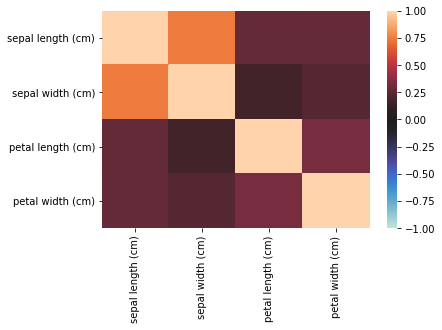

In [163]:
# 相関係数行列のヒートマップを作る
# ＜setosaの相関係数行列ヒートマップ＞
import seaborn as sns
print("setosa")
sns.heatmap(setosa_corr, vmax=1, vmin=-1, center=0)

virgiclor


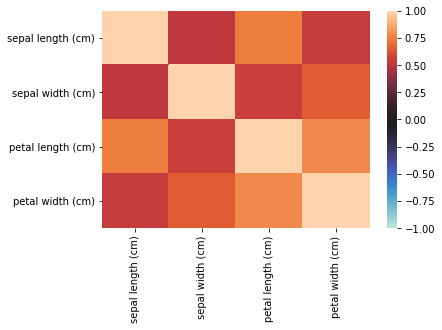

In [164]:
# ＜virgiclorの相関係数行列ヒートマップ＞
print("virgiclor")
sns.heatmap(virgiclor_corr, vmax=1, vmin=-1, center=0)

virginica


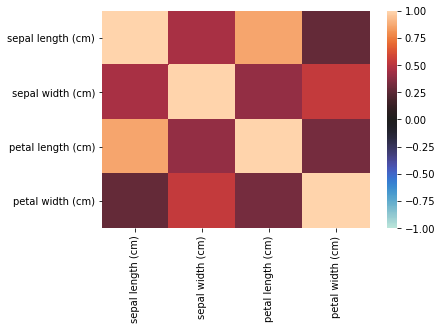

In [165]:
# ＜virginicaの相関係数行列ヒートマップ＞
print("virginica")
sns.heatmap(virginica_corr, vmax=1, vmin=-1, center=0)

## 【問題8】可視化したグラフや表の結果の説明

【考察】  
①グラフより、setosaの品種では、全特徴量を通して、他の品種とは離れた位置にプロットされている為、データから他品種との分離は容易である。  
②virgiclorとvirginicaでは、ガクの長さ(sepal length)とガクの幅(sepal width)との関係ではプロット位置が混在しているので、データから品種を分離するのは困難である。  
相関係数のヒートマップから、  
③setosaではガクの長さ(sepal length)とガクの幅(sepal width)の間に正の相関関係がみられるが、それ以外の特徴量では相関関係はみられない。  
④virgiclorでは各特徴量間に正の相関関係がみられる。  
⑤virginicaでも各特徴量間に正の相関関係はみられるが、virgiclorよりは小さい相関関係である。